In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:

file1 = '../seafood_data_junho/전복.csv'
file2 = '../seafood_data_junho/전복2022.csv'


In [4]:
file1 = pd.read_csv(file1)
file2 = pd.read_csv(file2)

In [5]:
df1 = pd.DataFrame(file1)
df2 = pd.DataFrame(file2)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32066 entries, 0 to 32065
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      32066 non-null  object
 1   어종      32066 non-null  object
 2   산지      32066 non-null  object
 3   규격      32066 non-null  object
 4   포장      32066 non-null  object
 5   수량      32066 non-null  object
 6   중량      32066 non-null  object
 7   평균가     32066 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [7]:
df1.columns

Index(['날짜', '어종', '산지', '규격', '포장', '수량', '중량', '평균가'], dtype='object')

In [8]:
df1.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [9]:
df1.describe()

,date,species,origin,standard,unit,amount,weight,avg_price
count,32066,32066,32066,32066,32066,32066,32066,32066
unique,1533,4,18,107,7,511,12,619
top,2018-08-13,(활)전복,완도,12/13미,kg,11,1,"23,000"
freq,40,31517,31880,1621,31844,1600,32020,1023


## 데이터타입 변환

In [10]:
df1 = df1[df1.date != '날짜']

### 평균가에 , 기호 없애기

In [11]:
df1['avg_price'] = df1.avg_price.str.replace(',', '').astype('int')

### 중량에 , 기호 없애기 (중량 float로 변환)

In [12]:
# df['weight'] = df.avg_price.str.replace(',', '').astype('float')
df1['weight'] = df1['weight'].astype('float')

### 수량에 , 기호 없애기

In [13]:
df1['amount'] = df1.amount.str.replace(',', '').astype('int')

In [14]:
df1.dtypes

date          object
species       object
origin        object
standard      object
unit          object
amount         int32
weight       float64
avg_price      int32
dtype: object

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3088 non-null   object
 1   어종      3088 non-null   object
 2   산지      3088 non-null   object
 3   규격      3088 non-null   object
 4   포장      3088 non-null   object
 5   수량      3088 non-null   int64 
 6   중량      3088 non-null   int64 
 7   평균가     3088 non-null   object
dtypes: int64(2), object(6)
memory usage: 193.1+ KB


In [16]:
df2.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [17]:
df2['avg_price'] = df2.avg_price.str.replace(',', '').astype('int')

In [18]:
df2.dtypes

date         object
species      object
origin       object
standard     object
unit         object
amount        int64
weight        int64
avg_price     int32
dtype: object

In [19]:
df = pd.concat([df1, df2], axis=0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35153 entries, 0 to 3087
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       35153 non-null  object 
 1   species    35153 non-null  object 
 2   origin     35153 non-null  object 
 3   standard   35153 non-null  object 
 4   unit       35153 non-null  object 
 5   amount     35153 non-null  int64  
 6   weight     35153 non-null  float64
 7   avg_price  35153 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 2.3+ MB


### 날짜 데이터 년, 월, 일로 나누고 int형으로 변환

In [21]:
df['yyyy'], df['mm'], df['dd'] = df['date'].str.split('-').str

In [22]:
df.tail()

,date,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
3083,2022-07-06,(활)전복,완도,20/21미,kg,12,1.0,14500,2022,07,06
3084,2022-07-06,(활)전복,완도,20미,kg,177,1.0,15400,2022,07,06
3085,2022-07-06,(활)전복,완도,22미,kg,93,1.0,16000,2022,07,06
3086,2022-07-06,(활)전복,완도,25미,kg,169,1.0,14100,2022,07,06
3087,2022-07-06,(활)전복,완도,30미,kg,125,1.0,13400,2022,07,06


In [23]:
df = df.drop('date', axis=1)

In [24]:
for i in ['yyyy', 'mm', 'dd']:
  df[i] = list(map(int, df[i]))

In [25]:
df.dtypes

species       object
origin        object
standard      object
unit          object
amount         int64
weight       float64
avg_price      int32
yyyy           int64
mm             int64
dd             int64
dtype: object

#### 년 / 월 / 일 별 가격변동

In [26]:
df[df.yyyy != 2022].groupby('mm').mean()

,amount,weight,avg_price,yyyy,dd
mm,,,,,
1,84.827321,1.000000,25774.017025,2019.007702,15.979327
2,76.761220,1.000000,24723.137255,2018.986928,14.709804
3,80.012406,1.017594,23336.842105,2018.992481,16.015038
4,89.368750,1.028906,22221.835938,2019.023438,15.468750
5,96.551128,1.013759,22057.781955,2018.977444,15.917293
6,107.539695,1.014504,21518.587786,2018.984733,15.694656
7,132.154248,1.025359,21167.058824,2018.856209,15.607843
8,101.655937,1.005625,21458.406250,2018.812500,16.081250
9,98.355493,1.028341,23956.927922,2018.825752,15.029391


<AxesSubplot:xlabel='dd'>

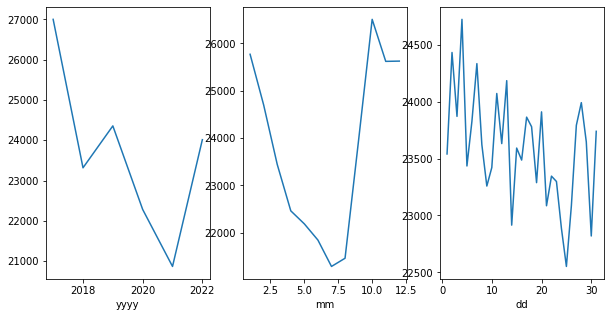

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
Years = df.groupby('yyyy').mean()
Years['avg_price'].plot(x=df.yyyy)
plt.subplot(132)
# Months = df[df.yyyy != 2022].groupby('mm').mean()
Months = df.groupby('mm').mean()
Months['avg_price'].plot(x=df.mm)
plt.subplot(133)
Days = df.groupby('dd').mean()
Days['avg_price'].plot(x=df.dd)

#### 산지별 가격분포

Text(0, 0.5, 'origin')

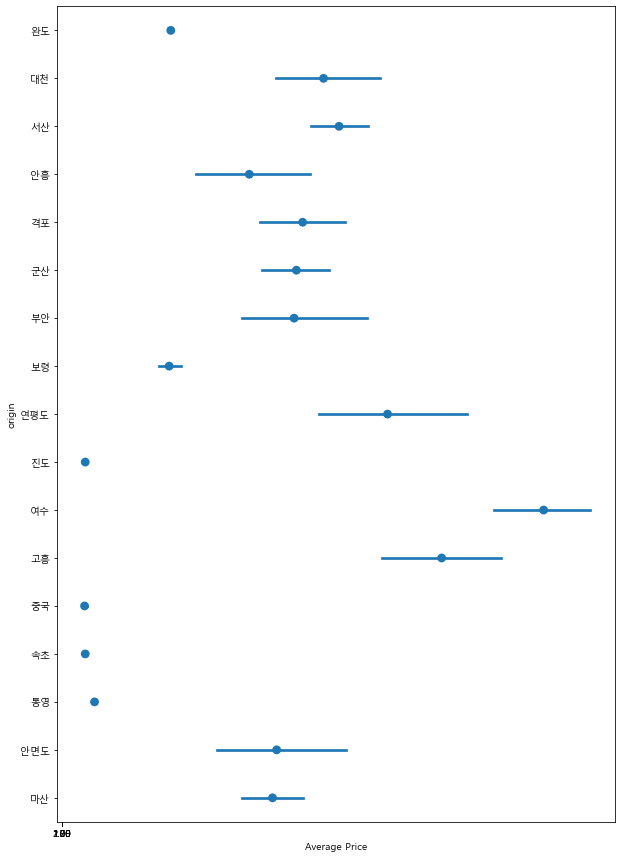

In [28]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=df, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [29]:
jb_pdf = df[df.species=='(활)전복']

Text(0, 0.5, 'origin')

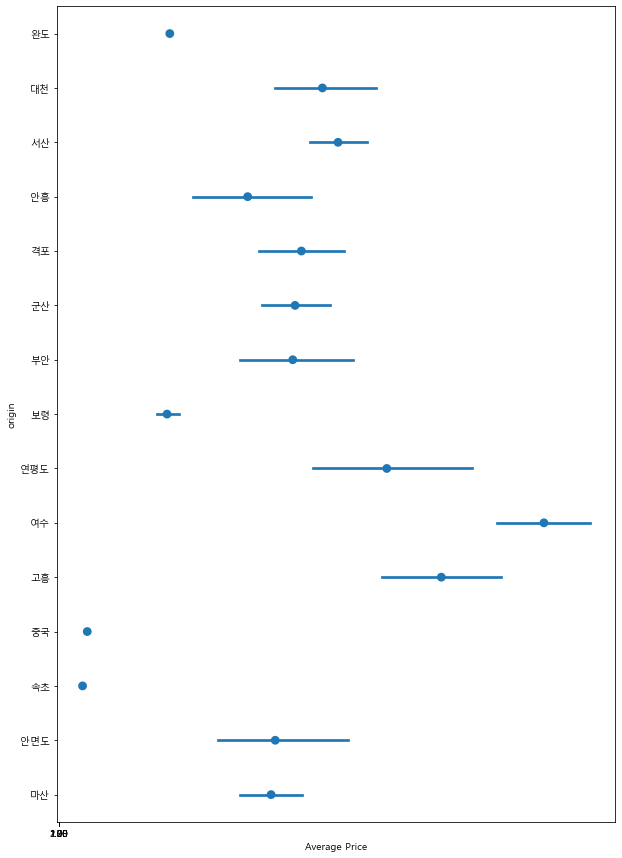

In [30]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=jb_pdf, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [31]:
jb_pdf.head()

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
0,(활)전복,완도,10/11미,kg,78,1.0,43100,2017,1,2
1,(활)전복,완도,11/12미,kg,33,1.0,40200,2017,1,2
2,(활)전복,완도,12/13미,kg,145,1.0,37700,2017,1,2
3,(활)전복,완도,12미,kg,35,1.0,35000,2017,1,2
4,(활)전복,완도,13/14미,kg,124,1.0,36100,2017,1,2


In [32]:
jb_pdf['origin'].count()

34602

In [33]:
jb_pdf['origin'].value_counts()

완도     34388
서산        48
여수        41
대천        35
군산        30
격포        13
안흥        12
안면도        8
보령         6
연평도        6
마산         5
부안         4
고흥         4
중국         1
속초         1
Name: origin, dtype: int64

### 10자리 이하를 제외한 완도, 서산, 여수, 대천, 군산만을 쿼리
-> 완도가 압도적으로 많이 차지하고 있어서 데이터 크게 편향적일 수 있음

In [34]:
origin_mask = (jb_pdf.origin == '완도')|(jb_pdf.origin == '서산')|(jb_pdf.origin == '여수')|(jb_pdf.origin == '대천')|(jb_pdf.origin == '군산')

jb_pdf = jb_pdf.loc[origin_mask, :]

In [35]:
jb_pdf['origin'].value_counts()

완도    34388
서산       48
여수       41
대천       35
군산       30
Name: origin, dtype: int64

In [36]:
jb_pdf['standard'].value_counts()

12/13미    1774
13/14미    1764
14/15미    1750
15/16미    1745
17/18미    1739
          ... 
37미          1
14코          1
120미         1
10/12        1
소소           1
Name: standard, Length: 104, dtype: int64

In [37]:
jb_pdf[jb_pdf.standard=='12/13미']

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
2,(활)전복,완도,12/13미,kg,145,1.0,37700,2017,1,2
23,(활)전복,완도,12/13미,kg,181,1.0,34900,2017,1,3
45,(활)전복,완도,12/13미,kg,144,1.0,33900,2017,1,4
64,(활)전복,완도,12/13미,kg,311,1.0,30300,2017,1,5
85,(활)전복,완도,12/13미,kg,152,1.0,31000,2017,1,6
...,...,...,...,...,...,...,...,...,...,...
2991,(활)전복,완도,12/13미,kg,199,1.0,21100,2022,7,1
3011,(활)전복,완도,12/13미,kg,130,1.0,21500,2022,7,2
3031,(활)전복,완도,12/13미,kg,336,1.0,20800,2022,7,4
3050,(활)전복,완도,12/13미,kg,126,1.0,18100,2022,7,5


In [38]:
standard_mask = (jb_pdf.standard == '12/13미')|(jb_pdf.standard == '13/14미')|(jb_pdf.standard == '14/15미')|(jb_pdf.standard == '15/16미')


jb_pdf = jb_pdf.loc[standard_mask, :]

In [39]:
jb_pdf['standard'].value_counts()

12/13미    1774
13/14미    1764
14/15미    1750
15/16미    1745
Name: standard, dtype: int64

#### 추려낸 위 규격에서 가장 많은 포장을 차지하는 kg 포장으로 단일화

In [40]:
jb_pdf['unit'].value_counts()

kg     7000
S/P      15
가구       11
box       7
Name: unit, dtype: int64

In [41]:
jb_pdf = jb_pdf[jb_pdf.unit == 'kg']

In [42]:
jb_pdf.head(3)

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
2,(활)전복,완도,12/13미,kg,145,1.0,37700,2017,1,2
4,(활)전복,완도,13/14미,kg,124,1.0,36100,2017,1,2
5,(활)전복,완도,14/15미,kg,99,1.0,35000,2017,1,2


In [43]:
jb_pdf[jb_pdf.unit != 'kg']

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd


In [44]:
jb_pdf = jb_pdf.drop(['species', 'unit'], axis=1)

jb_pdf.head()

,origin,standard,amount,weight,avg_price,yyyy,mm,dd
2,완도,12/13미,145,1.0,37700,2017,1,2
4,완도,13/14미,124,1.0,36100,2017,1,2
5,완도,14/15미,99,1.0,35000,2017,1,2
7,완도,15/16미,33,1.0,35700,2017,1,2
23,완도,12/13미,181,1.0,34900,2017,1,3


### 범주형 데이터 OHE 수행

In [45]:
jb_pdf = pd.get_dummies(jb_pdf, columns=['origin', 'standard'])

In [46]:
jb_pdf.head(3)

,amount,weight,avg_price,yyyy,mm,dd,origin_군산,origin_대천,origin_완도,standard_12/13미,standard_13/14미,standard_14/15미,standard_15/16미
2,145,1.0,37700,2017,1,2,0,0,1,1,0,0,0
4,124,1.0,36100,2017,1,2,0,0,1,0,1,0,0
5,99,1.0,35000,2017,1,2,0,0,1,0,0,1,0


In [47]:
len(jb_pdf.columns)

13

In [48]:
jb_pdf.describe()

,amount,weight,avg_price,yyyy,mm,dd,origin_군산,origin_대천,origin_완도,standard_12/13미,standard_13/14미,standard_14/15미,standard_15/16미
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,138.979571,1.005900,23485.414286,2019.216143,6.356143,15.696714,0.000143,0.000143,0.999714,0.252000,0.250714,0.249000,0.248286
std,83.528518,0.232213,3388.052110,1.586032,3.360281,8.738956,0.011952,0.011952,0.016902,0.434192,0.433455,0.432465,0.432049
min,1.000000,1.000000,11500.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,1.000000,21400.000000,2018.000000,3.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,126.000000,1.000000,23400.000000,2019.000000,6.000000,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,181.000000,1.000000,25600.000000,2021.000000,9.000000,23.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1873.000000,11.700000,101100.000000,2022.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 시각화

In [49]:
num_cols = ['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd']
num_jb_pdf = jb_pdf[num_cols]

<AxesSubplot:>

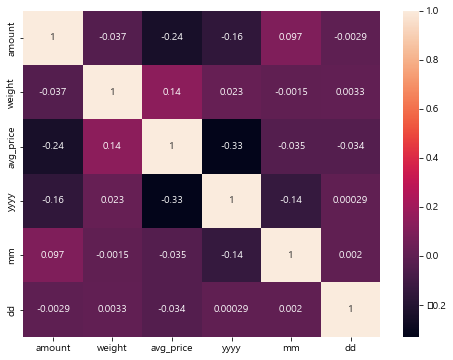

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_jb_pdf.corr(), annot=True)

In [51]:
print(jb_pdf.columns)
print("컬럼 수 :", len(jb_pdf.columns))

Index(['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd', 'origin_군산',
       'origin_대천', 'origin_완도', 'standard_12/13미', 'standard_13/14미',
       'standard_14/15미', 'standard_15/16미'],
      dtype='object')
컬럼 수 : 13


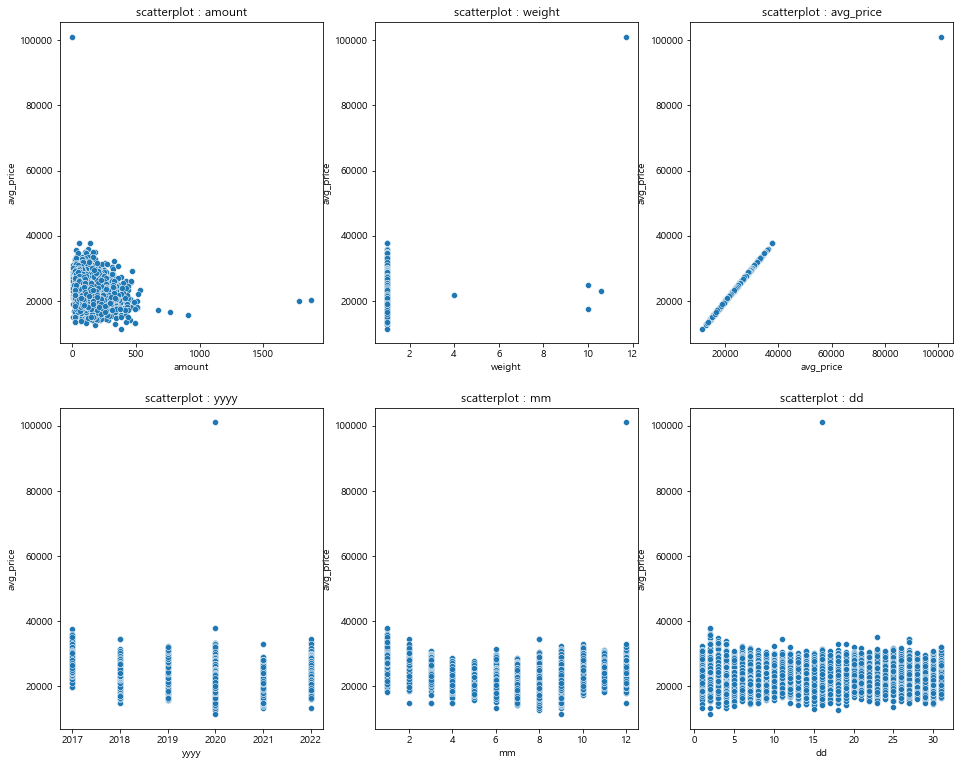

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_jb_pdf.columns)):
    sns.scatterplot(data = num_jb_pdf, y = 'avg_price' ,x = num_jb_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_jb_pdf.columns[i])

plt.show()

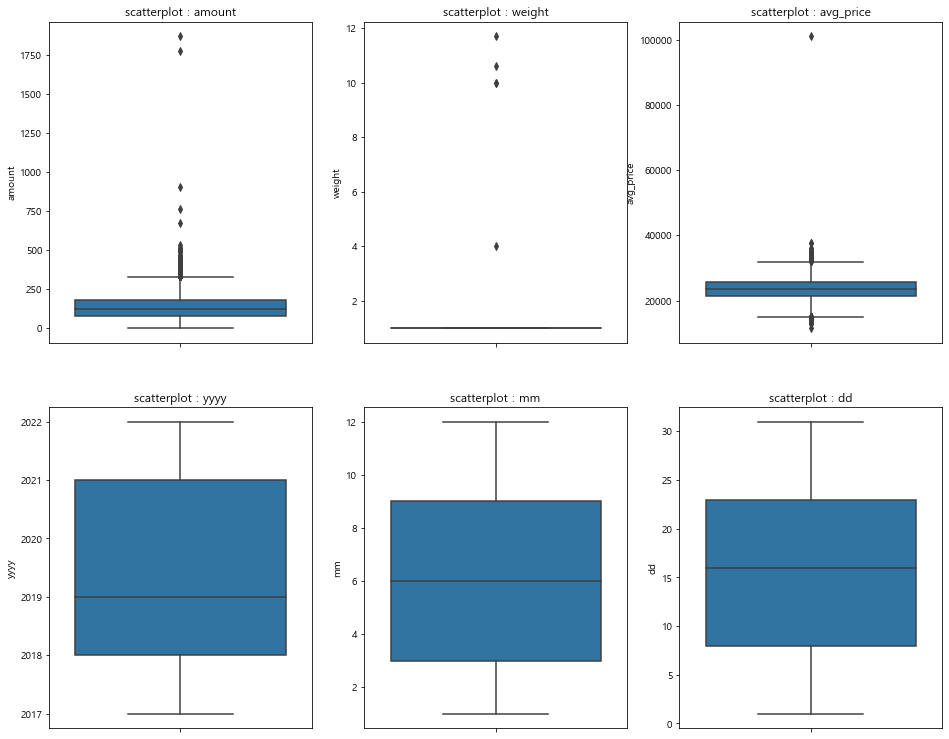

In [53]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_jb_pdf.columns)):
    sns.boxplot(data = num_jb_pdf, y = num_jb_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_jb_pdf.columns[i])

plt.show()

### 결측치 제거

amout > 1000 이상 데이터 제거

In [54]:
jb_pdf['amount'].sort_values()

25750       1
26955       6
14367      10
9167       10
10692      10
         ... 
23202     676
29374     767
29358     909
30255    1779
30057    1873
Name: amount, Length: 7000, dtype: int64

In [55]:
jb_pdf = jb_pdf[jb_pdf.amount < 1000]

weight > 4 이상 데이터 제거

In [56]:
jb_pdf['weight'].sort_values()

2         1.0
23458     1.0
23443     1.0
23441     1.0
23439     1.0
         ... 
23738     4.0
1254     10.0
1259     10.0
15886    10.6
25750    11.7
Name: weight, Length: 6998, dtype: float64

In [57]:
jb_pdf = jb_pdf[jb_pdf.weight < 4]

avg_price는 위의 이상치 제거하면서 사라짐 -> 제거하지 않음

In [58]:
jb_pdf['avg_price'].sort_values()

24023    11500
23764    12800
23724    13000
29617    13300
24022    13300
         ...  
364      35100
7        35700
4        36100
2        37700
19902    37800
Name: avg_price, Length: 6993, dtype: int32

In [59]:
jb_pdf.count()

amount             6993
weight             6993
avg_price          6993
yyyy               6993
mm                 6993
dd                 6993
origin_군산          6993
origin_대천          6993
origin_완도          6993
standard_12/13미    6993
standard_13/14미    6993
standard_14/15미    6993
standard_15/16미    6993
dtype: int64

In [60]:
jb_pdf.to_csv('cleaned_jb.csv')

In [61]:
cleaned_csv = pd.read_csv('./cleaned_jb.csv')

In [62]:
cleaned_csv.head()

,Unnamed: 0,amount,weight,avg_price,yyyy,mm,dd,origin_군산,origin_대천,origin_완도,standard_12/13미,standard_13/14미,standard_14/15미,standard_15/16미
0,2,145,1.0,37700,2017,1,2,0,0,1,1,0,0,0
1,4,124,1.0,36100,2017,1,2,0,0,1,0,1,0,0
2,5,99,1.0,35000,2017,1,2,0,0,1,0,0,1,0
3,7,33,1.0,35700,2017,1,2,0,0,1,0,0,0,1
4,23,181,1.0,34900,2017,1,3,0,0,1,1,0,0,0


## 선형 회귀

In [475]:
jb_pdf.head()

,amount,weight,avg_price,yyyy,mm,dd,origin_군산,origin_대천,origin_완도,standard_12/13미,standard_13/14미,standard_14/15미,standard_15/16미
2,145,1.0,37700,2017,1,2,0,0,1,1,0,0,0
4,124,1.0,36100,2017,1,2,0,0,1,0,1,0,0
5,99,1.0,35000,2017,1,2,0,0,1,0,0,1,0
7,33,1.0,35700,2017,1,2,0,0,1,0,0,0,1
23,181,1.0,34900,2017,1,3,0,0,1,1,0,0,0


In [63]:
X = jb_pdf.drop(columns='avg_price')
y = jb_pdf['avg_price']

In [70]:
X.head()

,amount,weight,yyyy,mm,dd,origin_군산,origin_대천,origin_완도,standard_12/13미,standard_13/14미,standard_14/15미,standard_15/16미
2,145,1.0,2017,1,2,0,0,1,1,0,0,0
4,124,1.0,2017,1,2,0,0,1,0,1,0,0
5,99,1.0,2017,1,2,0,0,1,0,0,1,0
7,33,1.0,2017,1,2,0,0,1,0,0,0,1
23,181,1.0,2017,1,3,0,0,1,1,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, shuffle =True, test_size = 0.2)

In [478]:
jb_model_lr = LinearRegression()
jb_model_lr.fit(X_train, y_train)
jb_lr_y_pred = jb_model_lr.predict(X_test)

In [479]:
print(jb_model_lr.score(X_train, y_train))
print(jb_model_lr.score(X_test, y_test))

0.3046846426244392
0.3133015675368981


In [480]:
MSE = mean_squared_error(y_test, jb_lr_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_lr_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 7214746.94087, RMSE : 2686.02810
r2_score :  0.3133015675368981


In [481]:
y_test = np.array(y_test)

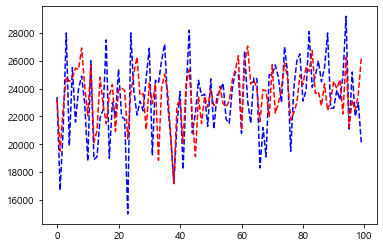

In [482]:
y_test = np.array(y_test)

real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(jb_lr_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

In [483]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [484]:
jb_model_lr.fit(x_train_scaled, y_train)
jb_y_pred_scaled = jb_model_lr.predict(x_test_scaled)

In [485]:
MSE = mean_squared_error(y_test, jb_y_pred_scaled)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_y_pred_scaled)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 7221825.56858, RMSE : 2687.34545
r2_score :  0.312627824911169


## 랜덤포레스트

In [486]:
jb_model_rf = RandomForestRegressor()

jb_model_rf.fit(X_train, y_train)
jb_rf_y_pred = jb_model_rf.predict(X_test)

In [487]:
MSE = mean_squared_error(y_test, jb_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1626012.00643, RMSE : 1275.15176
r2_score :  0.8452364434768568


In [488]:
rf_parameters = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 6, 9, 12],
    # 'max_depth': [5, 6, 9, 12],
    # 'min_samples_split': [0.01, 0.02, 0.1, 0.15],
    # 'max_features': ['auto', 'sqrt'],
    'random_state':[99]
}

cv = KFold(n_splits=6)

rf = RandomForestRegressor()
rf_grid_cv = GridSearchCV(rf, param_grid=rf_parameters, cv=cv, n_jobs=-1, scoring='r2')
rf_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', rf_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': None, 'n_estimators': 250, 'random_state': 99}
최적 예측 정확도: 0.8209


In [489]:
jb_model_rf = rf_grid_cv.best_estimator_
jb_rf_y_pred = jb_model_rf.predict(X_test)

In [490]:
MSE = mean_squared_error(y_test, jb_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1632603.01770, RMSE : 1277.73355
r2_score :  0.8446091121038724


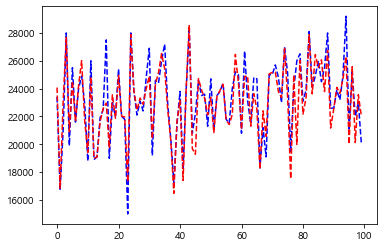

In [491]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(jb_rf_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## XGBRegressor

In [492]:
jb_model_xgb = XGBRegressor()

jb_model_xgb.fit(X_train, y_train)
jb_xgb_y_pred = jb_model_xgb.predict(X_test)

In [493]:
MSE = mean_squared_error(y_test, jb_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1750694.49907, RMSE : 1323.13813
r2_score :  0.8333691842441212


xgb에 gcv 해본 것

In [494]:
xg_parameters ={'max_depth' : [3,4,5,6] , 
                # 'n_estimators': [12,24,32], 
                'n_estimators': [100,200,300], 
                'learning_rate':[0.01, 0.1], 
                # 'learning_rate':[0.1, 0.3, 0.5], 
                'gamma': [1, 2, 4], 
                'random_state':[99]}

xgb = XGBRegressor()
xgb_grid_cv = GridSearchCV(xgb, param_grid=xg_parameters, cv=6, n_jobs=-1, scoring='r2')
xgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', xgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(xgb_grid_cv.best_score_))


최적 하이퍼 파라미터: {'gamma': 4, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'random_state': 99}
최적 예측 정확도: 0.8224


In [495]:
jb_model_xgb = xgb_grid_cv.best_estimator_
jb_xgb_y_pred = jb_model_xgb.predict(X_test)

In [496]:
MSE = mean_squared_error(y_test, jb_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1656692.19688, RMSE : 1287.12556
r2_score :  0.8423163079734042


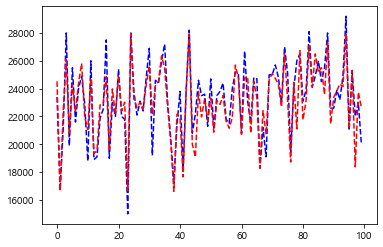

In [497]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(jb_xgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## lightGBM

In [65]:
jb_model_lgb = LGBMRegressor()

jb_model_lgb.fit(X_train, y_train)
jb_lgb_y_pred = jb_model_lgb.predict(X_test)

In [66]:
MSE = mean_squared_error(y_test, jb_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1728527.27896, RMSE : 1314.73468
r2_score :  0.8354790566241288


In [67]:
# lgb_parameters ={'max_depth' : [3,4,5,6] ,  
#                 'n_estimators': [100,300,500], 
#                 'learning_rate':[0.01, 0.05, 0.1],   
#                 'random_state':[99]}

lgb_parameters ={
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0] 
                }

lgb = LGBMRegressor()
lgb_grid_cv = GridSearchCV(lgb, param_grid=lgb_parameters, cv=6, n_jobs=-1, scoring='r2')
lgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', lgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

최적 하이퍼 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8}
최적 예측 정확도: 0.8331


In [68]:
jb_model_lgb = lgb_grid_cv.best_estimator_
jb_lgb_y_pred = jb_model_lgb.predict(X_test)

In [69]:
MSE = mean_squared_error(y_test, jb_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, jb_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1574707.46607, RMSE : 1254.87349
r2_score :  0.8501196012282868


In [72]:
jb_model_lgb.predict([[221, 1.0, 2022, 7, 7, 0, 0, 1, 0, 0, 0, 0]])

array([18961.12335512])

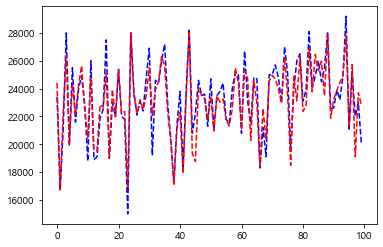

In [503]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(jb_lgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()